In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('Resources/')

In [2]:
file_paths = [
    '8_dtc.txt',
    '8_dtc_pca.txt',
    '8_dtc_isolation.txt',
    '8_dtc_lstm.txt',
    '9_rf.txt',
    '9_rf_pca.txt',
    '9_rf_isolation.txt',
    '9_rf_lstm.txt'
]

AUC = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        auc_scores = [float(line.strip()) for line in file.readlines()]
        AUC.append(auc_scores)

AUC = np.array(AUC)

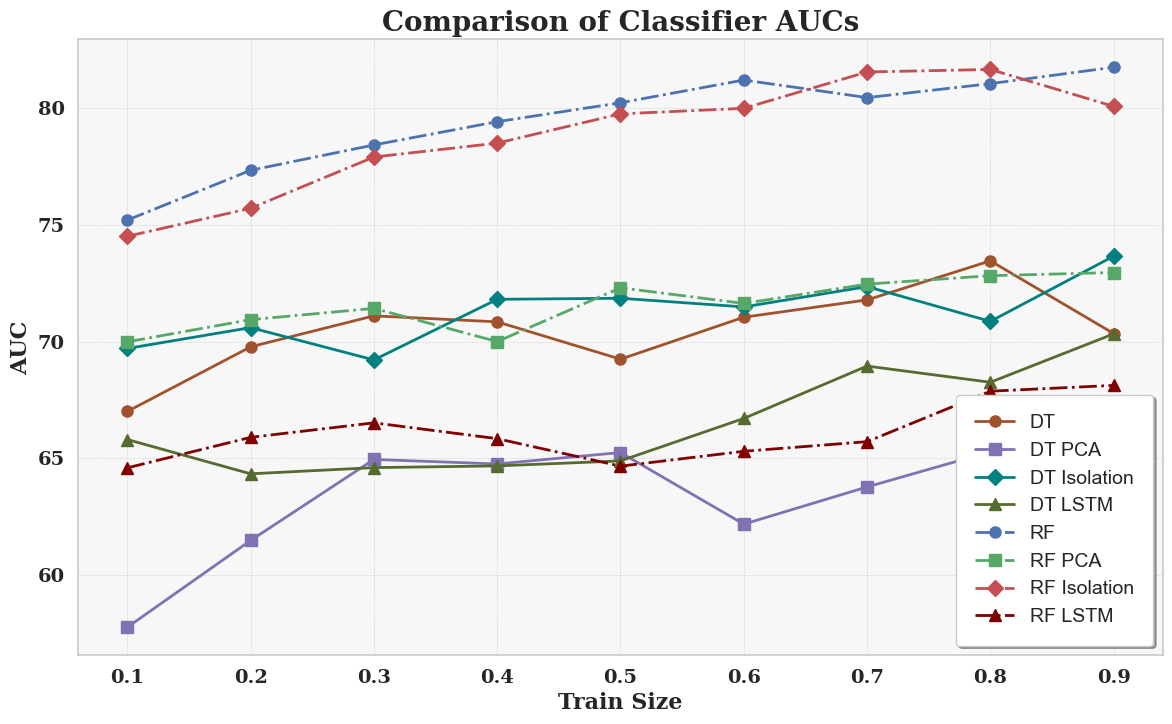

In [3]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

labels = [
    'DT',
    'DT PCA',
    'DT Isolation',
    'DT LSTM',
    'RF',
    'RF PCA',
    'RF Isolation',
    'RF LSTM'
]

colors = ['sienna', 'm', 'teal', 'darkolivegreen', 'b', 'g', 'r', 'maroon']
markers = ['o', 's', 'D', '^', 'o', 's', 'D', '^']
line_styles = ['-', '-', '-', '-', '-.', '-.', '-.', '-.']

for i in range(AUC.shape[0]):
    plt.plot(
        np.linspace(0.1, 0.9, len(AUC[i])), 
        AUC[i], 
        label=labels[i], 
        color=colors[i],
        marker=markers[i], 
        markersize=8, 
        linewidth=2,
        linestyle=line_styles[i]
    )

plt.title('Comparison of Classifier AUCs', size=20, fontweight='bold', family='serif')
plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('AUC', fontsize=16, fontweight='bold', family='serif')
plt.xticks(fontsize=14, fontweight='bold', family='serif')
plt.yticks(fontsize=14, fontweight='bold', family='serif')
plt.legend(loc='best', fontsize=14, frameon=True, fancybox=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#f7f7f7')

plt.savefig('Images/10_Comparison_of_classifier_AUCs.png', transparent=True)

plt.show()

In [4]:
mean_AUC = np.mean(AUC, axis=1)
print(mean_AUC)

[70.51223853 63.62466262 71.28392671 66.50263667 79.45979126 71.61616052
 78.85784203 66.05538935]


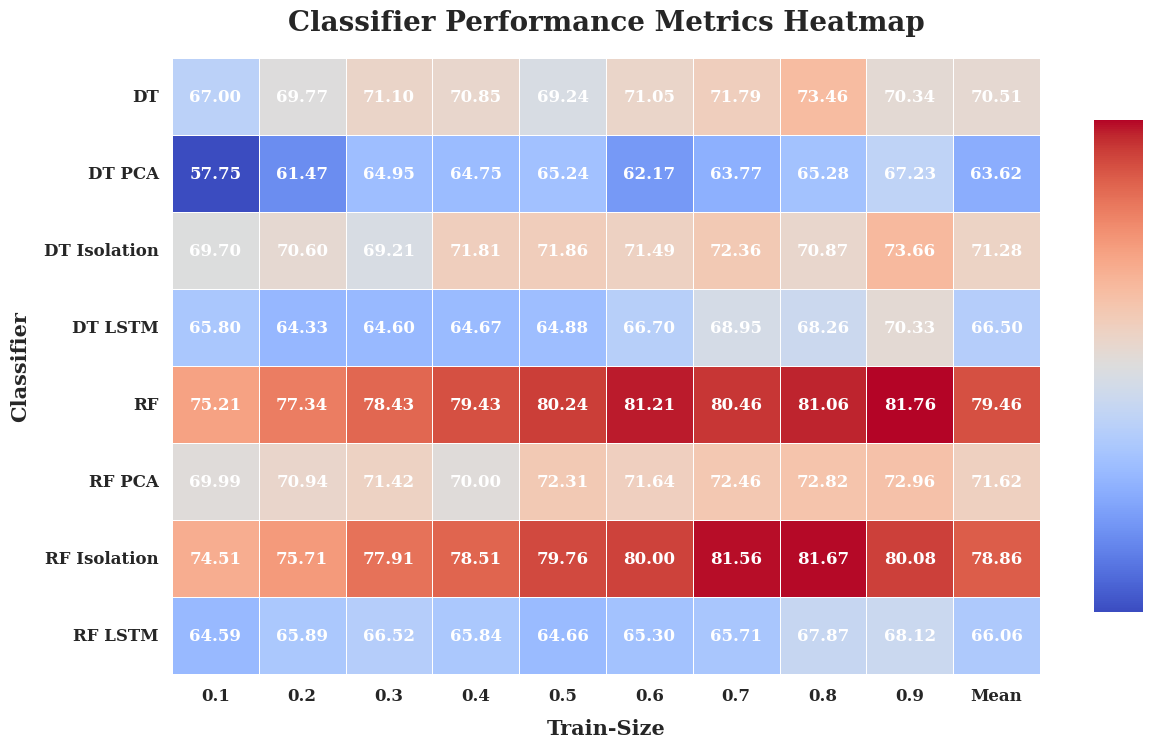

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Metric': ['DT', 'DT PCA', 'DT Isolation', 'DT LSTM', 'RF', 'RF PCA', 'RF Isolation', 'RF LSTM'],
    '0.1': [AUC[0][0], AUC[1][0], AUC[2][0], AUC[3][0], AUC[4][0], AUC[5][0], AUC[6][0], AUC[7][0]],
    '0.2': [AUC[0][1], AUC[1][1], AUC[2][1], AUC[3][1], AUC[4][1], AUC[5][1], AUC[6][1], AUC[7][1]],
    '0.3': [AUC[0][2], AUC[1][2], AUC[2][2], AUC[3][2], AUC[4][2], AUC[5][2], AUC[6][2], AUC[7][2]],
    '0.4': [AUC[0][3], AUC[1][3], AUC[2][3], AUC[3][3], AUC[4][3], AUC[5][3], AUC[6][3], AUC[7][3]],
    '0.5': [AUC[0][4], AUC[1][4], AUC[2][4], AUC[3][4], AUC[4][4], AUC[5][4], AUC[6][4], AUC[7][4]],
    '0.6': [AUC[0][5], AUC[1][5], AUC[2][5], AUC[3][5], AUC[4][5], AUC[5][5], AUC[6][5], AUC[7][5]],
    '0.7': [AUC[0][6], AUC[1][6], AUC[2][6], AUC[3][6], AUC[4][6], AUC[5][6], AUC[6][6], AUC[7][6]],
    '0.8': [AUC[0][7], AUC[1][7], AUC[2][7], AUC[3][7], AUC[4][7], AUC[5][7], AUC[6][7], AUC[7][7]],
    '0.9': [AUC[0][8], AUC[1][8], AUC[2][8], AUC[3][8], AUC[4][8], AUC[5][8], AUC[6][8], AUC[7][8]],
    'Mean': [mean_AUC[0], mean_AUC[1], mean_AUC[2], mean_AUC[3], mean_AUC[4], mean_AUC[5], mean_AUC[6], mean_AUC[7]]
}

df = pd.DataFrame(data)

df.set_index('Metric', inplace=True)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

ax = sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", 
                 annot_kws={"size": 12, "weight": "bold", "color": "w", "family": "serif"},
                 cbar_kws={"shrink": .8, "aspect": 10, "ticks": [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]})

plt.title('Classifier Performance Metrics Heatmap', fontsize=20, fontweight='bold', family='serif', pad=20)
plt.xlabel('Train-Size', fontsize=15, fontweight='bold', family='serif', labelpad=10)
plt.ylabel('Classifier', fontsize=15, fontweight='bold', family='serif', labelpad=10)

plt.xticks(fontsize=12, fontweight='bold', family='serif')
plt.yticks(fontsize=12, fontweight='bold', family='serif', rotation=360)

sns.despine(left=True, bottom=True)

plt.show()

In [6]:
best_classifier = np.argmax(mean_AUC)
print("Best classifier based on mean AUC score:", labels[best_classifier])

Best classifier based on mean AUC score: RF
